<a href="https://colab.research.google.com/github/lsGee/TIL/blob/master/01.Python/python_ds_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns

## 데이터 시각화 패키지 matplotlib 로드
import matplotlib.pyplot as plt

## Data Load
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/bike/train.csv")

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Pandas

## 컬럼 내 데이터 타입 조회/변경

In [ ]:
## 데이터프레임 내 모든 컬럼의 타입 확인
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
## 1개 컬럼 내 데이터 타입 변경
train["windspeed"].astype("int")

0         0
1         0
2         0
3         0
4         0
         ..
10881    26
10882    15
10883    15
10884     6
10885     8
Name: windspeed, Length: 10886, dtype: int64

In [ ]:
## 2개 이상 컬럼 내 데이터 타입 변경
train.astype({"windspeed": "int", "humidity": "float"}).dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed       int64
casual          int64
registered      int64
count           int64
dtype: object

## 소수점 반올림

In [ ]:
## 소수 첫째자리까지 반올림
train["temp"].round(1)

0         9.8
1         9.0
2         9.0
3         9.8
4         9.8
         ... 
10881    15.6
10882    14.8
10883    13.9
10884    13.9
10885    13.1
Name: temp, Length: 10886, dtype: float64

In [ ]:
## 자리수를 적어주지 않으면 자동으로 0으로 간주
train["temp"].round()
# train["temp"].round(0)

0        10.0
1         9.0
2         9.0
3        10.0
4        10.0
         ... 
10881    16.0
10882    15.0
10883    14.0
10884    14.0
10885    13.0
Name: temp, Length: 10886, dtype: float64

## 중복 데이터 제거

In [ ]:
train["season"].unique()

array([1, 2, 3, 4])

## 컬럼 내 데이터 빈도수 구하기

In [ ]:
train["season"].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

## Data(CSV) Save

`index = False` → 데이터프레임 인덱스 컬럼을 제외하고 저장

In [ ]:
train.to_csv("data/new.csv", index=False)

# Matplotlib

## 단일그래프 크기 변경

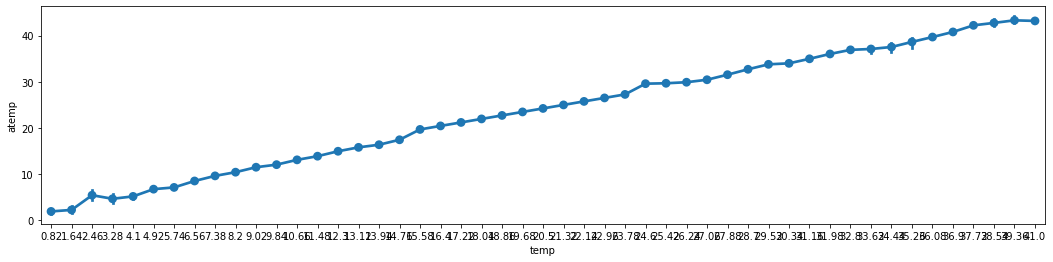

In [ ]:
## 출력할 그래프가 1개인 경우
plt.figure(figsize = (18, 4))

sns.pointplot(data=train, x="temp", y="atemp")

## Subplots

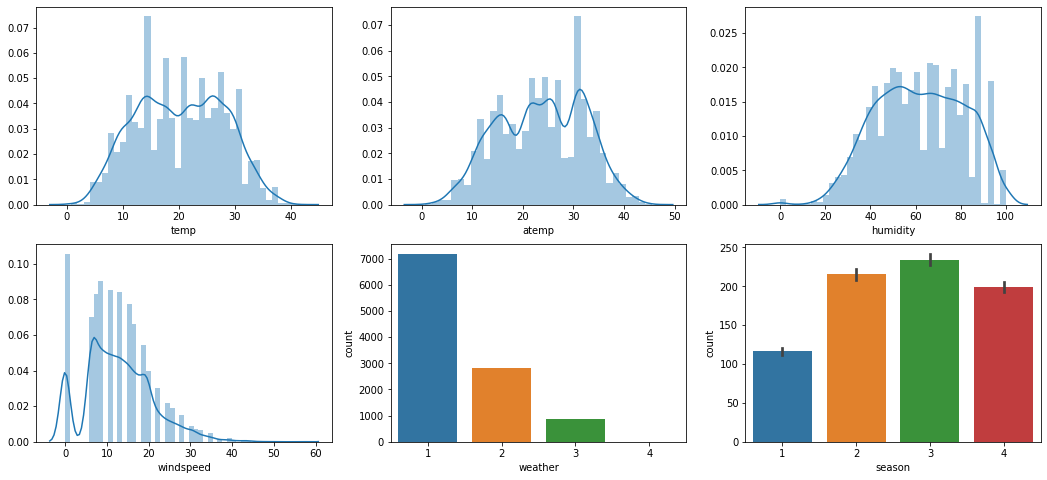

In [ ]:
## subplots 행과 열 개수, 각 축의 이름 설정
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

## subplots 전체 크기 설정
figure.set_size_inches(18,8)

sns.distplot(train["temp"], ax=ax1)
sns.distplot(train["atemp"], ax=ax2)
sns.distplot(train["humidity"], ax=ax3)
sns.distplot(train["windspeed"], ax=ax4)
sns.countplot(data=train, x="weather", ax=ax5)
sns.barplot(data=train, x="season", y="count", ax=ax6)

아래와 같이 방식으로 subplot을 생성할 수도 있다.

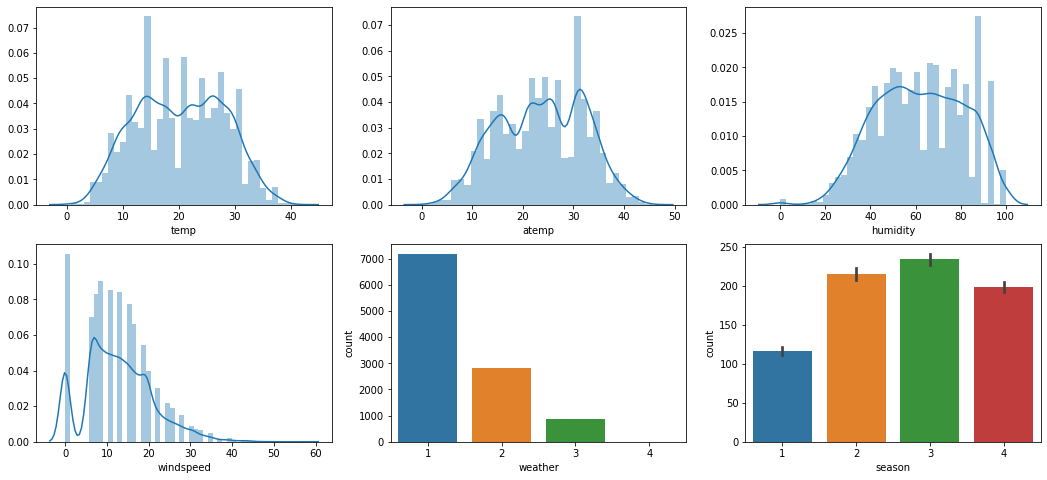

In [ ]:
## subplots 행과 열 개수 설정
figure, axes = plt.subplots(nrows = 2, ncols = 3)

## subplots 전체 크기 설정
figure.set_size_inches(18,8)

sns.distplot(train["temp"], ax=axes[0][0])
sns.distplot(train["atemp"], ax=axes[0][1])
sns.distplot(train["humidity"], ax=axes[0][2])
sns.distplot(train["windspeed"], ax=axes[1][0])
sns.countplot(data=train, x="weather", ax=axes[1][1])
sns.barplot(data=train, x="season", y="count", ax=axes[1][2])

## 그래프 축(tick, label) 부분 설정

`matplotlib` 은 기본적으로 주피터노트북 테마가 흰색 배경이라고 가정하고 그래프를 그려줌

→ 그래서 주피터 노트북 테마가 어두울 때, 그래프의 tick 부분 글자색이 기본적으로 검정색이라 보이지 않는 경우 발생

### 배경색 변경

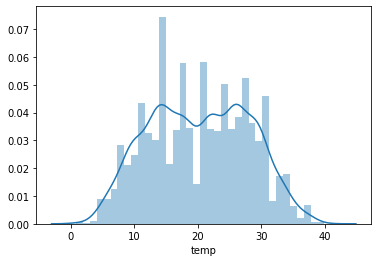

In [ ]:
plt.figure().patch.set_facecolor('white')

sns.distplot(train["temp"])

### 라벨, 눈금 색상 변경

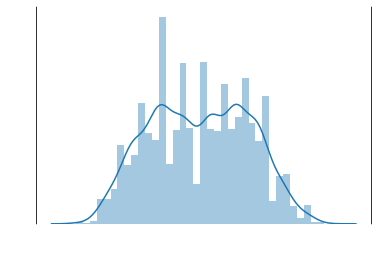

In [ ]:
fig = plt.figure().add_subplot(1,1,1)

# fig.set_xlabel('X-axis')   # x축 라벨명
# fig.set_ylabel('Y-axis')   # y축 라벨명

fig.spines['bottom'].set_color('white')
fig.spines['top'].set_color('white')
fig.xaxis.label.set_color('white')

fig.tick_params(colors='white')
# fig.tick_params(axis='x', colors='white')

sns.distplot(train["temp"])

**참고)** 

[축에 대한 추가적인 설정](https://m.blog.naver.com/PostView.nhn?blogId=jung2381187&logNo=220408716017&proxyReferer=https:%2F%2Fwww.google.com%2F)

# Seaborn

## scatterplot

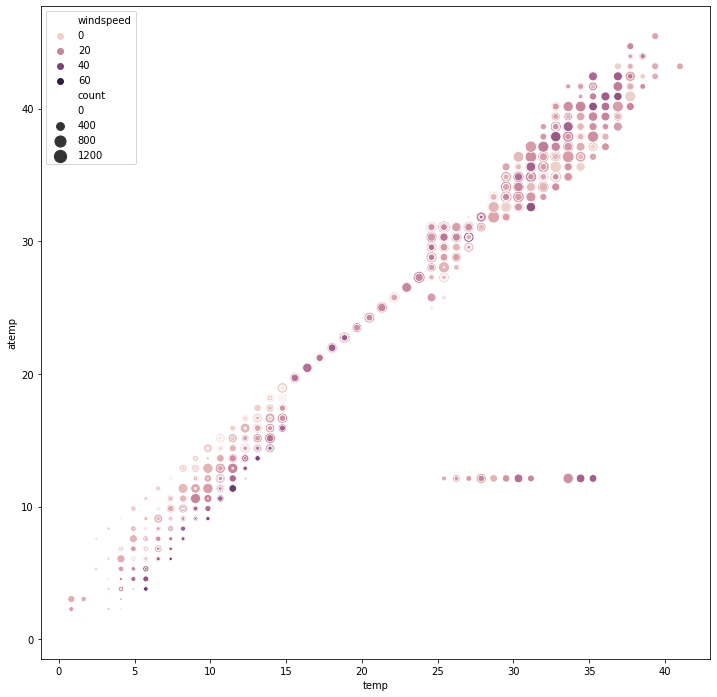

In [ ]:
plt.figure(figsize = (12, 12))

sns.scatterplot(data=train, x="temp", y="atemp", hue="windspeed",
                size="count", sizes=(0, 150))